# Part 2: ML Algorithms: Selection, Training, and Verification

Based on paper "Hierarchical Machine Learning Model for Mechanical Property Predictions of Polyurethane Elastomers From Small Datasets," available at https://www.frontiersin.org/journals/materials/articles/10.3389/fmats.2019.00087/full.  Q1-4 answered using information from the journal article.

An ATTEMPT at modeling is made. 

## Question 1: Selection of ML algorithms (7.5 pts):
   1. What kinds of ML algorithms are appropriate for the desired process model(s)? Why?

       The appropriate kinds of algorithms are ones for prediction and regression since the objective is to predict mechanical properties at break based on chemical interrelationships. For example, the paper cites parametrization of certain properties using a gaussian regression framework, which implies that Gaussian Process Regression (GPR) would have success here due to the small dataset with non-linear data. Additionally, some kind of dimensionaloty reduction (such as PCA) would be helpful here. 

       This paper chose Hierarchical Machine Learning (HML) to predict properties using an intermediate layer between what they claim to be responses and system variables. This intermediate layer was predicted based on domain knowlegde of the material. A Random Forest Model was lso used in comparison to the HML model. 

   1. Of the desired kinds, and considering the available samples (i.e., number of data entries), how many parameters/degrees of freedom are feasible? There is not 1 fixed number, but rather, this is an order of magnitude type question related to "the curse of dimensionality."
     
      As the input dimension increases, the amount of input data sample size needed also grows. As features/dimesnions increase, if the number of samples does not increaae with it, the data points end up very spread out, creating various gaps in the exploration space. This makes it difficult for models to generalize, pick up on accurate patterns, or provide reliable predictions. Typically, ML models use the common rule of thumb of attempting to have at least 10 times the runs as the number of input dimensions, which for 18 samples would indicate around 1-2 dimensions. Using all the factors and cofactors would lead to an overfit model, so PCA could reduce the inputs to only the important dimensions/features (probably arruond 2-4). Since the chosen GPR methods works best will smaller datasets, this reduction would not hinder the results. 


## Question 2: ML training (7.5 pts):
   1. How were the data divided into training vs. testing batches?

      There was an input dataset of 18 polymers, which was split into 14 for a training set, and 4 data points for a test set. However, under "Polymer Synthesis" the paper mentions using a training set of 18 samples, so it is not super clear how they divided things. 

   1. What methodology was used to train? How were hyperparameter choices addressed? Is it clear that each algorithm was optimally trained before the performance of algorithms were compared?

      The paper simply vaguely says "A model was developed on the training set and validated against the test set." They mention comparing an HML and random forest model to directly predict mechanical propeties, but do not explicitly mention how random forest was trained. The paper describes how the polymers were chemically prepared and how Monte Carlo simulations of step growth polymerization were performed using 200,000 monomers.  They claim to focus on parameters that "would provide insight into the crosslinking tendency," and that they were determined using Monte Carlo simulation. The paper also mentions that "The number of decision trees used in our training set is equal to 100 and the max depth of trees was unrestricted" since they had a sparse dataset where memory/computational efficiency was not a concern. Training and test scores are shown in Table 1 and 2. However, specific hyperparameter settings anc choices are not explicitly mentioned for HML or RF. Training for RF prior to comparison is mentioned as "based on composition using the same training set," but mentions none of its hyperparameters. 

## Question 3: Testing and validation (7.5 pts):
   1. What testing and verification methodologies were used? 

      The paper chose to break the dataset into a training and test set (supposedly) and validate against the test set. The authors also claim that since RF allow for "out-of-bag" (OOB) error estimate to measure prediction error of a trained decision tree on the subset of data not used in that tree," that an independent validation dataset is not needed. For HML, the paper mentions validating intermediate variable methodology on "a system of dispersant dosed concentrated MgO suspension, which acted as a non-setting model of cement." This paper also references a lot of previous work in the field to back up its ML approach. 

   1. Were bias, variance, and sensitivity to model parameterization (e.g., regularization, boot-strapping, etc. - for some simpler models, this analysis may not be necessary) all considered when evaluating the predictions? How?

      Bias, variance ans sensitivity are not explicitly mentioned to be considered, other than loose mentions of accuracy. The variance was reliant on GPR's inherent uncertainty predicition. Given Figures 7 and 9, there appears to be no obvious bias in the predictions. They do mention averaging decision trees to improve the prediction accuracy and to try to avoid overfitting. However, no sensitivity is mentioned. This most likely has to do with the small dataset and the fact that many cofactors/intermediate variables are parametrized from the factors through physical measurements and chemical relationships. That intermediate layer is grouped into 3 categories based on how they can be measured. Part of this layer is also predicted variables from the monte-carlo simulations. The others compare accuarcy between two methods (HML and RF), but not sensitivity to model parametrization. 



## Question 4: Overall impact of the ML modeling (7.5 pts):
   1. Did the ML models perform better than random guessing as a minimum requirement? Did they perform better than the previous state of the art/other methods for solving the engineering/science problem? Do the ML models work well enough to demonstrate that they solved the problem/answered the question at hand?

      The model did perform better than random guessing, although the comparison is not explcitly mentioned in the paper. Figures 7 and 9 show relative ability to correctly predict where the properties would end up. Previously, HML had been used in this field to design a superplasticizer, but the paper considers the previous solving method to be either by hand with a large amount of information, or even a simpler ML model like random forrest. The paper emphasizses HML's ability to utilize existing scientific domain expertise requiring less input data. The ML models seem to work well enough to show they demonstrated that they could solve the problem at hand given their relative resultant accuracy. Figure 6 also seems to imply that ML models can be used to find what properties matter the most for desired mechanical properties as well. 

   1. Are there broader impacts of the ML modeling work that was done? Are the impacts limited to this specific data set and choice of model parameterization? Or could/would the models be used and/or improved upon by others in the field? Is there lasting benefit to the work? What are the extensions of the work that would add the most value to the field?

      Based on the conclusion section of the paper, this ML modeling could allow for "the possibility of modeling categorical and qualitative responses of polyurethane products to formulation and processing variables and  predicting the properties of novel monomers, such as bio based materials." They hope to expand this work to model responses for other polymers, sepcifically substituting polyols and diisocyanates to further test the HML approach. The authors claim this is not limited to this specific data set, or at least that is their hope. This model could be improved with bigger datasets and more input information. The extensions of this work that could add the most value is knowing what chemical compositions to combine to get an ideal mechanical property, which is always useful in engineering. Polymer design and other R&D sectors could benefit from the predicition without having to waste resources to test possible material/chemical combinations. 

## Question 5: Make your own model! (30 pts)

1. Try to implement a ML algorithm of your own using your inputs and outputs from Part 1.
1. This will include:
   * Formatting of inputs and outputs results from HW8
   * Training of model using inputs/outputs
   * Evaluation of model (test/validation set)
   * Some comments on why you think the model did or did not do well

      The model did not do as well as the paper's HML, but was close to Random Forrest results replicated. This is probably due to the majority of the factors actually being cofactors that were predicted in the paper, but I did not have the knowledge or ability to replicate those values and did not want to use them from the excel sheet as the instructions were to use our own inputs and outputs. Both models have an RMSE relatively far from 0, and their R squared values are also far from good fits. 


Random Forest PERFORMANCE:
R² = -0.12464515227553367
RMSE = 6.51155843668166

Gaussian Process (with PCA) PERFORMANCE:
R² = -0.31821779618643736
RMSE = 3.9349692745402027


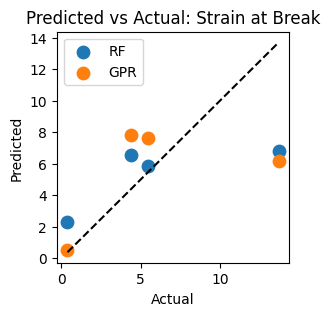

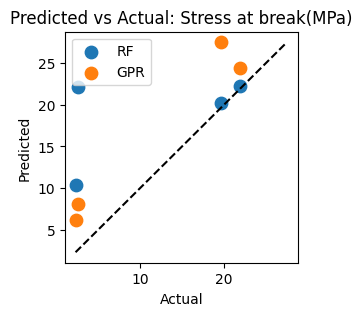

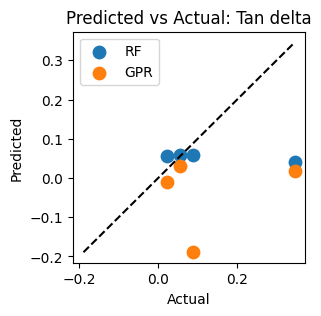

In [ ]:
# Packages 
import pandas as pd                      # for loading and handling data
import numpy as np                       # for numerical operations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA        # PCA for dimensionality 
import matplotlib.pyplot as plt 


# Part 1 plotted ditribution w/ histograms and Q-Q plots, & statistical relationships
 

#small dataset implies GPR best - RBF kernel bc common choice 
#split 3:1 similar to paper w/ 14:4; 5-fold cross validation for stability 

# Data loading 
file = "Table 2_results.XLSX"

df_inputs = pd.read_excel(file, sheet_name="Samples")

df_outputs = pd.read_excel(file, sheet_name="Lattice Plot")

output_columns = ["Strain at Break", "Stress at break(MPa)", "Tan delta"]

Y = df_outputs[output_columns]



# words vs numerical columns
categorical_cols = ["Isocyanate", "Polyol"]
numeric_cols = ["NCO groups", "OH groups", "NCO:OH Index", "iso_mw",
        "iso_density","Chain length (units)", "polyol_mw", "polyol_density", 
        "vol of iso(ml)","vol of polyol (ml)", "weight of polymer (g)", "HS%", "SS%"]

# Create preprocessing pipeline
#    - one-hot encode categoricals --> convert categories/words into numbers
#    - scale numerical features

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

# PCA to reduce dimension 
pca = PCA(n_components=3)   # recommended from HW8 comment

# Train/test (copy split of 14/4 from paper, at least their supposed split, who knows what they actually did)
X_train, X_test, y_train, y_test = train_test_split(
    df_inputs, Y, test_size=4, random_state=1
)


# Gaussian Process Regression model
kernel = C(1.0) * RBF(length_scale=1.0) #typically used for small datasets
gpr_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', GaussianProcessRegressor(kernel=kernel, normalize_y=True))
])

# random forrest for comparison
rf_model = Pipeline(steps=[
    ("preprocess", preprocess),          # encode + scale inputs
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=1
    ))
])

# Train
rf_model.fit(X_train, y_train)
gpr_model.fit(X_train, y_train)

# predict for test
rf_pred = rf_model.predict(X_test)
gpr_pred = gpr_model.predict(X_test)

results = {}        # store model R²/RMSE
predictions = {}    # store predictions for plotting 


def evaluate(name, y_true, y_pred):
    print(f"\n{name} PERFORMANCE:")
    print("R² =", r2_score(y_true, y_pred, multioutput='uniform_average'))
    print("RMSE =", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate("Random Forest", y_test, rf_pred)
evaluate("Gaussian Process (with PCA)", y_test, gpr_pred)


for i, col in enumerate(output_columns):
    plt.figure(figsize=(3,3))
    plt.scatter(y_test[col], rf_pred[:,i], label="RF", s=80)
    plt.scatter(y_test[col], gpr_pred[:,i], label="GPR", s=80)
    mn = min(y_test[col].min(), rf_pred[:,i].min(), gpr_pred[:,i].min())
    mx = max(y_test[col].max(), rf_pred[:,i].max(), gpr_pred[:,i].max())
    plt.plot([mn,mx],[mn,mx],'k--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Predicted vs Actual: {col}")
    plt.legend()
    plt.show()

